# 画像の収集
1. ' TrainData ' 以下のフォルダに入る
2. 任意のフォルダで ' googleimagesdownload -k _KEYWORD_ -l 5 ' を実行する

    [参考ページ](https://co.bsnws.net/article/295)
    

## キーワードとDL数の設定

In [2]:
from tkinter import Tk

root = Tk()
root.attributes('-topmost', True)
root.withdraw()
root.lift()
root.focus_force()
temp = askdirectory(title='画像を保存するフォルダを選択してください')
root.destroy()

if not temp:
    print('フォルダが選択されませんでした')
else:
    from pathlib import Path
    from tkinter.filedialog import askdirectory
    
    image_dir_path = Path(temp)

    #　検索キーワードを設定
    keyword = 'salad'
    dl_num = 3
    
    print(f'path: {str(image_dir_path)}')
    print(f'keyword: {keyword}')
    print(f'dl_num: {dl_num}')

path: C:\Users\init\Documents\PythonScripts\PredictEvaluationFromHumanPreference\TrainData\Photography\Artificial
keyword: salad
dl_num: 3


## ダウンロード

In [15]:
%cd $str(image_dir_path)
!googleimagesdownload -k $keyword -l $dl_num -o ./

C:\Users\init\Documents\PythonScripts\PredictEvaluationFromHumanPreference\TrainData\Photography\Artificial
C:\Users\init\Documents\PythonScripts\PredictEvaluationFromHumanPreference\TrainData\Photography\Artificial

Item no.: 1 --> Item name = salad
Evaluating...
Starting Download...
Completed Image ====> 1.Greek-Salad.jpg
Completed Image ====> 2.Everyday-Green-Salad-Recipe-3.jpg
Completed Image ====> 3.exps6498_MRR133247D07_30_5b_WEB-2.jpg
Completed Image ====> 4.avocado-salad-1524672116.png
Completed Image ====> 5.quick-chopped-salad-recipe-photos-tablefortwoblog-3.jpg

Errors: 0


Everything downloaded!
Total errors: 0
Total time taken: 2.378906726837158 Seconds


## 画像ごとにフォルダを作る

In [3]:
dl_path = str(image_dir_path/keyword)
%run -i C:\Users\init\Documents\PythonScripts\PredictEvaluationFromHumanPreference\JupyterUtil\image_folder_formatter\main.py -p $dl_path -n $dl_num

dl_path: C:\Users\init\Documents\PythonScripts\PredictEvaluationFromHumanPreference\TrainData\Photography\Artificial\salad
dl_num: 3
-- complete! --


In [6]:
from tkinter import Tk

root = Tk()
root.attributes('-topmost', True)
root.withdraw()
root.lift()
root.focus_force()

temp = askdirectory(title='作業フォルダを選択してください')
root.destroy()

if not temp:
    print('フォルダが選択されませんでした')
else:
    from tkinter.filedialog import askdirectory
    from pathlib import Path
    import itertools
    from pprint import pprint
    
    work_dir_path = Path(temp)
    
    work_image_path_list = [path for path in itertools.chain(work_dir_path.glob('**/*.png'), work_dir_path.glob('**/*.jpg'))]
    
    print(f'work path: {str(image_dir_path)}')
    print('work images path:')
    for path in work_image_path_list:
        print(f'\t{str(path)}')


path: C:\Users\init\Documents\PythonScripts\PredictEvaluationFromHumanPreference\TrainData\Photography\Artificial
image:
	C:\Users\init\Documents\PythonScripts\PredictEvaluationFromHumanPreference\TrainData\Photography\Artificial\salad\1\1.Greek-Salad.jpg
	C:\Users\init\Documents\PythonScripts\PredictEvaluationFromHumanPreference\TrainData\Photography\Artificial\salad\2\2.Everyday-Green-Salad-Recipe-3.jpg
	C:\Users\init\Documents\PythonScripts\PredictEvaluationFromHumanPreference\TrainData\Photography\Artificial\salad\3\3.exps6498_MRR133247D07_30_5b_WEB-2.jpg


# 学習データを作る

## スコアをつける
1. ’ 1 ’の画像に対して100枚の補正画像を生成する
2. ’ 2、3 ’の画像に対して10枚の補正画像を生成する

In [6]:
image_num_list = [100, 10, 10]
for image_path, image_num in zip(work_image_path_list, image_num_list):
    %run -i C:\Users\init\Documents\PythonScripts\PredictEvaluationFromHumanPreference\TrainDataGenerator\tournament_comparer.py

tournament complete


## スコアデータのグラフ化
グラフは ' 研究成果/画像/_カテゴリ_/グラフ ' に保存する

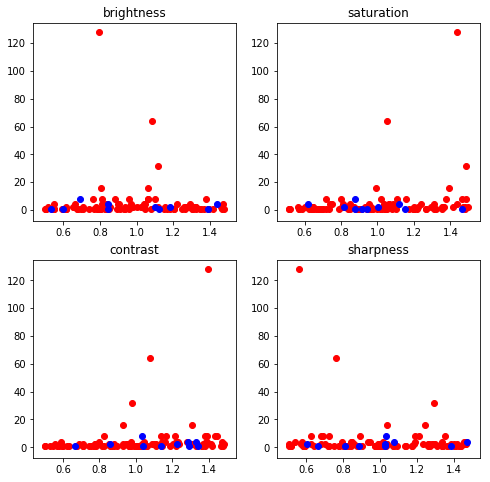

In [3]:
%matplotlib inline
%run -i C:\Users\init\Documents\PythonScripts\PredictEvaluationFromHumanPreference\TrainDataGenerator\param_score_graphizer.py

### モデルタイプの選択

In [1]:
model_type = 'compare'

## スコアデータからTFRecords形式へ変換

In [3]:
%run -i C:\Users\init\Documents\PythonScripts\PredictEvaluationFromHumanPreference\TrainDataGenerator\TFRecordsMaker\ScoredParamConverter\scored_param_converter.py $model_type

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 165.55it/s]


--- complete ! ---


# 好みの学習

## 学習

In [2]:
%run -i C:\Users\init\Documents\PythonScripts\PredictEvaluationFromHumanPreference\UserPreferencePredictor\predictor_trainer.py $model_type --jupyter

--- train ---


epoch: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [01:12<00:00,  7.27s/it]




{'accuracy': 0.6473842,
 'loss': 0.56919247,
 'precision': 0.6094321,
 'recall': 0.5397059}

--- inference ---


batch: 7it [00:01,  6.93it/s, accuracy=0.63, recall=0.283, precision=0.96]  



{'accuracy': 0.62968516, 'precision': 0.96, 'recall': 0.28318584}

--- complete ! ---


## 評価値高い順に並び替え
1. 既知画像に対する出力を ' 研究成果/画像/_カテゴリ_/評価値とスコアの比較/既知 ' に保存する
2. 未知画像に対する出力を ' 研究成果/画像/_カテゴリ_/評価値とスコアの比較/未知_i ' に保存する

In [8]:
%run -i C:\Users\init\Documents\PythonScripts\PredictEvaluationFromHumanPreference\UserPreferencePredictor\evaluate_visualizer.py $model_type

INFO:tensorflow:Restoring parameters from C:\Users\init\Documents\PythonScripts\PredictEvaluationFromHumanPreference\TrainData\Photography\Artificial\salad\1\Compare\summary\0618\1521\save


# 最適化
1. 既知画像に対する出力を ' 研究成果/画像/_カテゴリ_/最適化/既知 ' に保存する
2. 未知画像に対する ' 研究成果/画像/_カテゴリ_/最適化/未知_i ' に保存する

In [10]:
%run -i C:\Users\init\Documents\PythonScripts\PredictEvaluationFromHumanPreference\ParameterOptimizer\parameter_optimizer.py $model_type

INFO:tensorflow:Restoring parameters from C:\Users\init\Documents\PythonScripts\PredictEvaluationFromHumanPreference\TrainData\Photography\Artificial\salad\1\Compare\summary\0618\1521\save


C:\Anaconda3\envs\UnityML\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
C:\Anaconda3\envs\UnityML\lib\site-packages\deap\creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


gen	nevals	avg    	std    	min     	max    
0  	30    	0.38206	0.77649	-1.28197	1.92031
1  	19    	0.928818	0.513182	-0.0270597	1.92031
2  	17    	1.15031 	0.598538	-0.681955 	1.92031
3  	19    	1.35442 	0.522524	-0.454905 	2.15773
4  	16    	1.75041 	0.350841	0.884286  	2.2444 
5  	15    	1.87168 	0.356067	0.9466    	2.27707
6  	20    	1.85557 	0.387683	0.964509  	2.63557
7  	23    	1.97694 	0.268373	1.1874    	2.55267
8  	25    	2.0264  	0.35519 	1.0154    	2.58795
9  	20    	2.02983 	0.453296	0.913227  	2.86195
10 	16    	2.20045 	0.320929	1.14621   	2.86195
[{'brightness': 1.1478494002774178, 'saturation': 1.3820145989064754, 'contrast': 1.4803336554865139, 'sharpness': 1.021245554722713}, {'brightness': 1.1478482081844867, 'saturation': 1.397637692023447, 'contrast': 0.952928854612376, 'sharpness': 1.0212446010483682}, {'brightness': 1.1468996598392622, 'saturation': 1.3818925285903374, 'contrast': 1.4803334170679276, 'sharpness': 1.0210014438927604}, {'brightness': 1.021872953232